In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import metrics
from scipy import stats
from scipy.stats import wilcoxon, mannwhitneyu
from sklearn.metrics import roc_auc_score, r2_score
from sklearn.linear_model import LinearRegression
import scipy
import os
from os.path import join
import pandas as pd

CURRENT_DIR = os.getcwd()
print(CURRENT_DIR)

import warnings
warnings.filterwarnings("ignore")

c:\Users\aless\OneDrive\Desktop\Internship_results


## Script to obtain the results of the fitted gradient boosting models

### Plot performance of different models

Pearson r

In [3]:
models = ["brenda", "sabio", "bs_esm2_ChemBERTa2"] 
model_names = {"brenda": "BRENDA",
               "sabio": "SABIO-RK",
               "bs_esm2_ChemBERTa2": "BRENDA \n + SABIO-RK"}

*Xgboost is trained in HPC and results are copied inside the training_results directory*

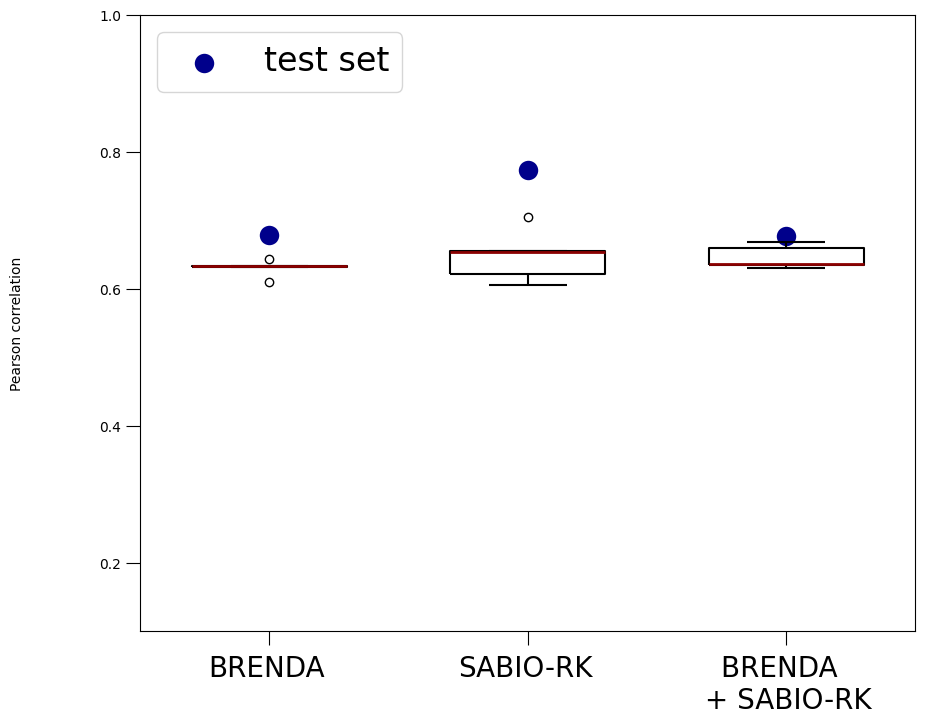

In [4]:
fig, ax = plt.subplots(figsize= (10,8))

plt.rcParams.update({"font.size": 24})
plt.ylim(0.1, 1)
plt.xlim(0.5, len(models) + 0.5)

labs = [model_names[model] for model in models]
Boxplots = []
ticks = []

for i, model in enumerate(models):
    Pearson_CV = np.load(join("training_results_dataset_comparison", "Pearson_CV_xgboost_" + model + ".npy"))
    MSE_CV = np.load(join("training_results_dataset_comparison", "MSE_CV_xgboost_" + model + ".npy"))
    R2_CV = np.load(join("training_results_dataset_comparison", "R2_CV_xgboost_" + model + ".npy"))
    pred_y = np.load(join("training_results_dataset_comparison", "y_test_pred_xgboost_" + model + ".npy"))
    test_y = np.load(join("training_results_dataset_comparison", "y_test_true_xgboost_" + model + ".npy"))
    Pearson_test = stats.pearsonr(test_y, pred_y)[0]
    
    if i == 0:
        plt.scatter(i+1, Pearson_test, c='darkblue', marker="o", linewidths= 8, label = "test set")
    else:
        plt.scatter(i+1, Pearson_test, c='darkblue', marker="o", linewidths= 8)
        
    Boxplots.append(Pearson_CV)
    ticks.append(i+1)

        
plt.boxplot(Boxplots, positions=ticks,  widths=0.6,
           medianprops={"linewidth": 2,"solid_capstyle": "butt", "c" : "darkred"},
            boxprops= {"linewidth": 1.5, "solid_capstyle": "butt"},
           whiskerprops= {"linewidth": 1.5, "solid_capstyle": "butt"},
           capprops= {"linewidth": 1.5, "solid_capstyle": "butt"})



ax.locator_params(axis="y", nbins=8)

ticks1 = ticks
ax.set_xticks(ticks1)
ax.set_xticklabels([])
ax.tick_params(axis="x", which="major", length=10)
ax.tick_params(axis="y", length=10)


ticks2 = list(np.array(ticks)-0.01)

ax.set_xticks(ticks2, minor=True)
ax.set_xticklabels(labs, minor=True, y= -0.03, fontsize = 20)
ax.tick_params(axis='x', which="minor",length=0)


plt.ylabel("Pearson correlation")
ax.yaxis.set_label_coords(-0.15, 0.5)
plt.legend(loc = "upper left")
plt.show()


Mean Squared Error

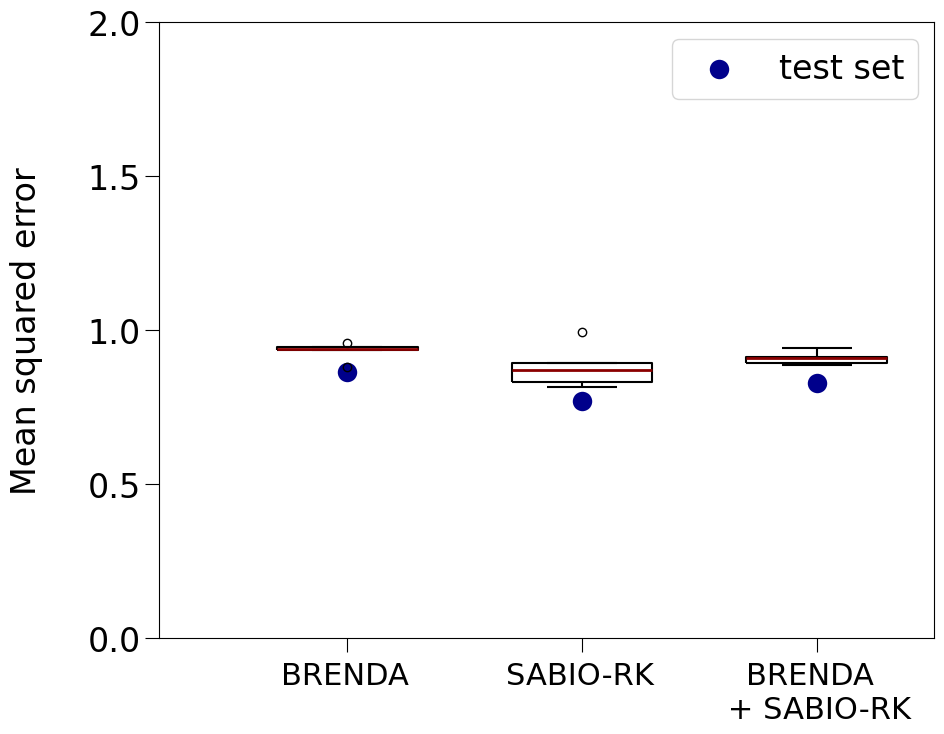

In [5]:
fig, ax = plt.subplots(figsize= (10,8))
plt.rcParams.update({"font.size": 24})

plt.ylim(0.0, 2.0)
plt.xlim(0.2, len(models) + 0.5)

labs = [model_names[model] for model in models]
Boxplots = []
ticks = []
for i, model in enumerate(models):
    Pearson_CV = np.load(join( "training_results_dataset_comparison", "Pearson_CV_xgboost_" + model + ".npy"))
    MSE_CV = np.load(join( "training_results_dataset_comparison", "MSE_CV_xgboost_" + model + ".npy"))
    R2_CV = np.load(join( "training_results_dataset_comparison", "R2_CV_xgboost_" + model + ".npy"))
    pred_y = np.load(join( "training_results_dataset_comparison", "y_test_pred_xgboost_" + model + ".npy"))
    test_y = np.load(join("training_results_dataset_comparison", "y_test_true_xgboost_" + model + ".npy"))
    MSE_test = np.mean(abs(test_y -  pred_y)**2)

    
    if i == 0:
        plt.scatter(i+1, MSE_test, c='darkblue', marker="o", linewidths= 8, label = "test set")
    else:
        plt.scatter(i+1, MSE_test, c='darkblue', marker="o", linewidths= 8)
        
    Boxplots.append(MSE_CV)
    ticks.append(i+1)

        
plt.boxplot(Boxplots, positions=ticks,  widths=0.6,
           medianprops={"linewidth": 2,"solid_capstyle": "butt", "c" : "darkred"},
            boxprops= {"linewidth": 1.5, "solid_capstyle": "butt"},
           whiskerprops= {"linewidth": 1.5, "solid_capstyle": "butt"},
           capprops= {"linewidth": 1.5, "solid_capstyle": "butt"})


ax.locator_params(axis="y", nbins=4)

ticks1 = ticks
ax.set_xticks(ticks1)
ax.set_xticklabels([])
ax.tick_params(axis='x', which="major", length=10)
ax.tick_params(axis='y', length=10)

ticks2 = list(np.array(ticks)-0.01)

ax.set_xticks(ticks2, minor=True)
ax.set_xticklabels(labs, minor=True, y= -0.03, fontsize = 22)
ax.tick_params(axis="x", which="minor",length=0)

plt.ylabel("Mean squared error")
ax.yaxis.set_label_coords(-0.15, 0.5)
plt.legend(loc = "upper right")
plt.show()

Coefficients of determination

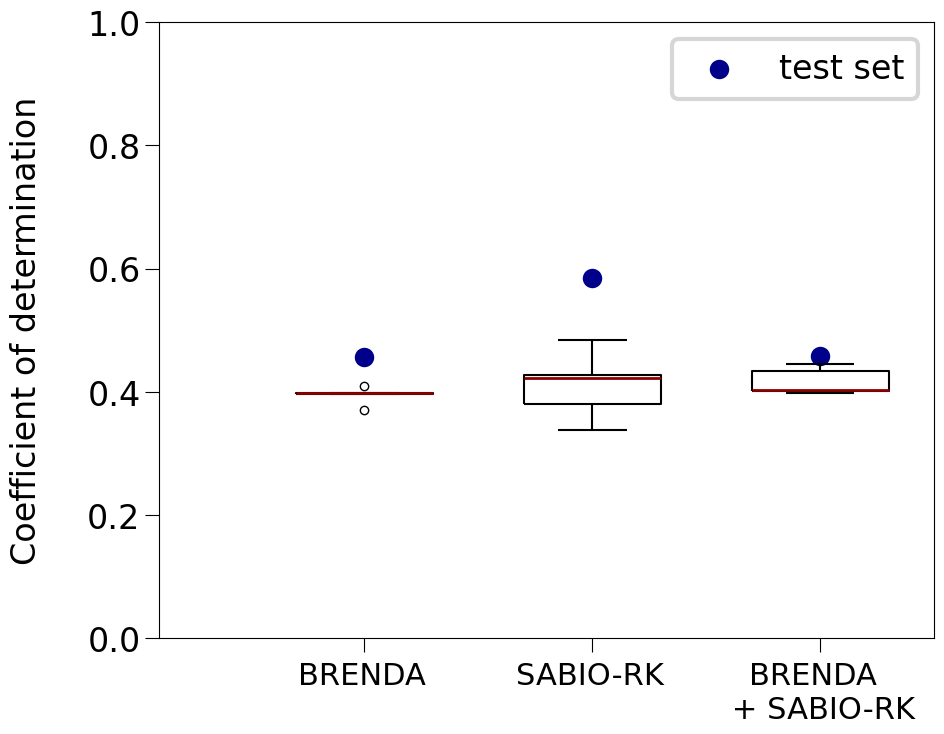

In [6]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.rcParams.update({"font.size": 24})
plt.ylim(0.0, 1)
plt.xlim(0.1, len(models) + 0.5)

labs = [model_names[model] for model in models]
Boxplots = []
ticks = []

for i, model in enumerate(models):
    Pearson_CV = np.load(join("training_results_dataset_comparison", "Pearson_CV_xgboost_" + model + ".npy"))
    MSE_CV = np.load(join("training_results_dataset_comparison", "MSE_CV_xgboost_" + model + ".npy"))
    R2_CV = np.load(join("training_results_dataset_comparison", "R2_CV_xgboost_" + model + ".npy"))
    pred_y = np.load(join("training_results_dataset_comparison", "y_test_pred_xgboost_" + model + ".npy"))
    test_y = np.load(join("training_results_dataset_comparison", "y_test_true_xgboost_" + model + ".npy"))
    R2_test = r2_score(test_y, pred_y)

    if i == 0:
        plt.scatter(i+1, R2_test, c='darkblue', marker="o", linewidths=8, label="test set")
    else:
        plt.scatter(i+1, R2_test, c='darkblue', marker="o", linewidths=8)

    Boxplots.append(R2_CV)
    ticks.append(i+1)

plt.boxplot(Boxplots, positions=ticks, widths=0.6,
           medianprops={"linewidth": 2, "solid_capstyle": "butt", "c": "darkred"},
           boxprops={"linewidth": 1.5, "solid_capstyle": "butt"},
           whiskerprops={"linewidth": 1.5, "solid_capstyle": "butt"},
           capprops={"linewidth": 1.5, "solid_capstyle": "butt"})

ax.locator_params(axis="y", nbins=8)

ticks1 = ticks
ax.set_xticks(ticks1)
ax.set_xticklabels([])  
ax.tick_params(axis="x", which="major", length=10)
ax.tick_params(axis="y", length=10)


ticks2 = list(np.array(ticks) - 0.01)


ax.set_xticks(ticks2, minor=True)
ax.set_xticklabels(labs, minor=True, y=-0.03, fontsize= 22)  
ax.tick_params(axis="x", which="minor", length=0)
ax.locator_params(axis="y", nbins=5)

plt.ylabel("Coefficient of determination")
ax.yaxis.set_label_coords(-0.15, 0.5)

leg = plt.legend(loc = "upper right")
leg.get_frame().set_linewidth(3.0)
plt.show()

### Plotting predictions versus experimental values

Loading predictions for the best model (brenda_sabio)

In [ ]:
model = "sabio"

pred_y = np.load(join("training_results_dataset_comparison", "y_test_pred_xgboost_" + model + ".npy"))
test_y = np.load(join("training_results_dataset_comparison", "y_test_true_xgboost_" + model + ".npy"))

data_test = pd.read_pickle(join("partitions_sabio","test_df.pkl"))

data_test["n_values"] = data_test["log_km"].apply(lambda x: len(x) if isinstance(x, (list, np.ndarray)) else [x])
n_values = np.array(data_test["n_values"])

In [8]:
np.mean(abs(pred_y-test_y)), 10**np.mean(abs(pred_y-test_y))

(np.float64(0.6177844475761896), np.float64(4.147481405098847))

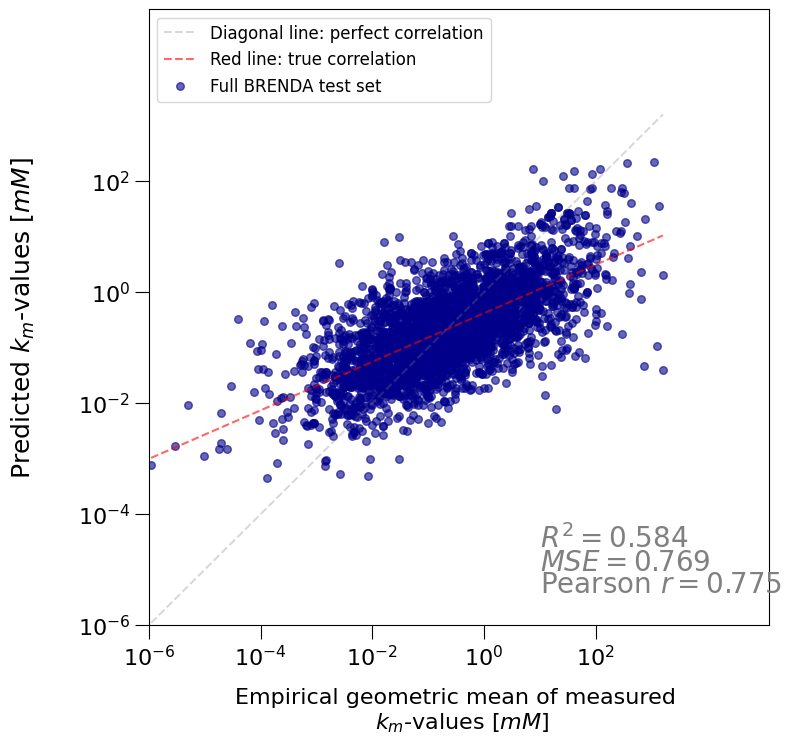

In [16]:
fig, ax = plt.subplots(figsize= (8,8))
plt.rcParams.update({"font.size": 16})


plt.ylim(ymax = 5.1, ymin = -3.5)
plt.xlim(xmax = 5.1, xmin = -3.5)

ax.tick_params(axis="x", length=10)
ax.tick_params(axis="y", length=10)

ax.text(1, -4.6, r'$R^2= 0.584 $', fontsize=20, c = "grey") 
ax.text(1, -5, r'$MSE= 0.769 $', fontsize=20, c = "grey")
ax.text(1, -5.4, r'Pearson $r=0.775 $', fontsize=20, c = "grey") 

ax.yaxis.set_label_coords(-0.18, 0.5)
ax.xaxis.set_label_coords(0.5, -0.1)

plt.xticks([-6, -4,-2,0,2], ["$10^{-6}$", "$10^{-4}$", "$10^{-2}$", "$10^{0}$", "$10^{2}$"])
plt.yticks([-6, -4,-2,0,2], ["$10^{-6}$", "$10^{-4}$", "$10^{-2}$", "$10^{0}$", "$10^{2}$"])

reg = LinearRegression().fit(test_y.reshape(-1,1), pred_y.reshape(-1,1),)
reg.score(test_y.reshape(-1,1), pred_y.reshape(-1,1))
beta0, beta1 =reg.intercept_[0], reg.coef_[0][0]

min_val = min(test_y.min(), pred_y.min())
max_val = max(test_y.max(), pred_y.max())
x_vals = np.array([min_val, max_val])

plt.plot(x_vals, x_vals, color="grey", alpha=0.3, linestyle= "dashed", label="Diagonal line: perfect correlation")
plt.plot(x_vals, beta0 + beta1 * x_vals, color="red", alpha=0.6, linestyle= "dashed", label= "Red line: true correlation")

plt.ylabel("Predicted $k_{m}$-values [$mM$]", fontsize = 18)
plt.xlabel("Empirical geometric mean of measured \n $k_{m}$-values [$mM$]", fontsize = 16)

plt.scatter(test_y, pred_y, alpha = 0.6, s=30, c="darkblue", label="Full BRENDA test set")

plt.savefig(join("figures", "scatter_plot.png"))

leg = plt.legend(loc = "upper left", prop={"size": 12})
plt.show()